# Task 1 : TITANIC SURVIVAL PREDICTION
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

## Importing the Dataset

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('titanicdataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis 

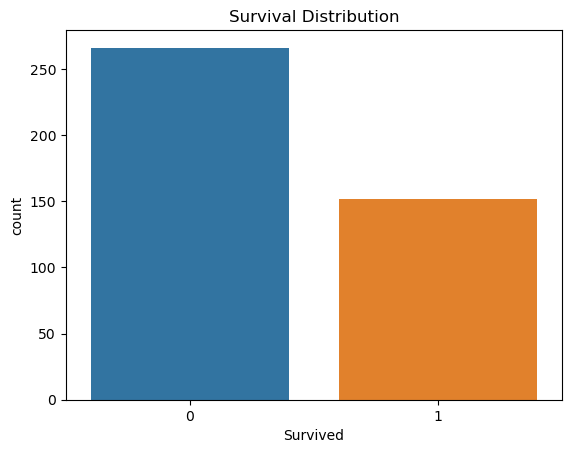

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()


## Visualize the age distribution of passengers

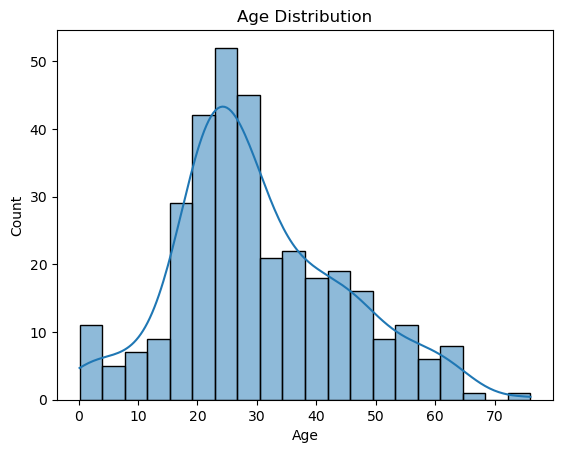

In [4]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

## Visualize the survival rate by passenger class

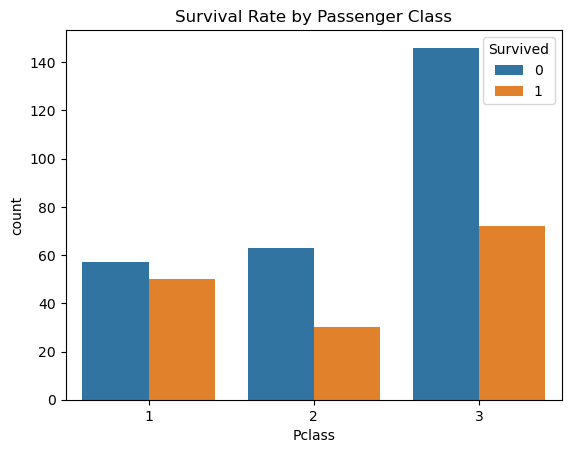

In [5]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

## Visualize the survival rate by gender

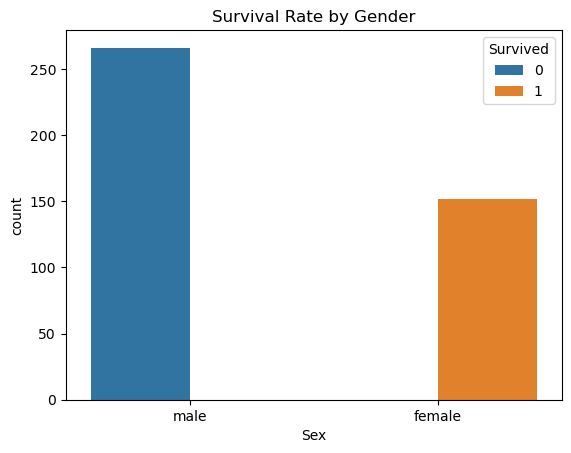

In [6]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

## Data Preprocessing

In [7]:
# Select the independent variables (features)
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Select the dependent variable (target)
target = df['Survived']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Sex', 'Embarked'])

# Handling missing values
features['Age'].fillna(features['Age'].mean(), inplace=True)
features['Fare'].fillna(features['Fare'].mean(), inplace=True)

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features[['Age', 'Fare']] = scaler.fit_transform(features[['Age', 'Fare']])


## Train-Test Split 

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Model Training and Evaluation 

### Support Vector Machine(SVM)

Accuracy: 1.0


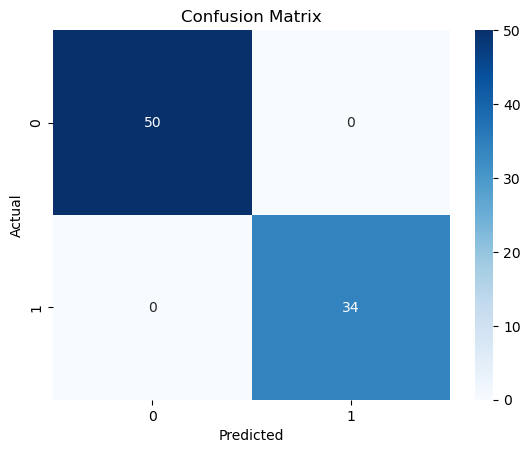

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###  Random Forest Classifier

Accuracy: 1.0


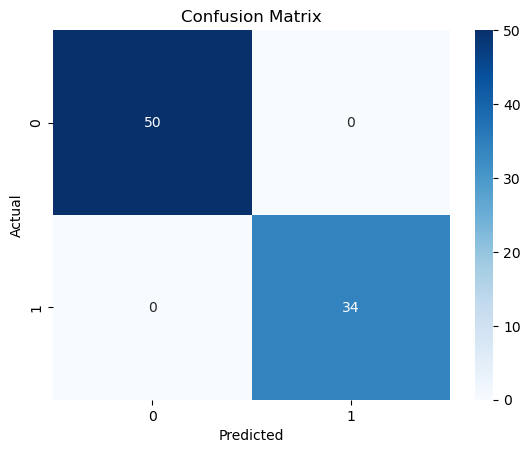

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The code begins by importing the Titanic dataset and performing exploratory data analysis to visualize the survival distribution, survival rate by gender, survival rate by passenger class, and age distribution. The data is then preprocessed by selecting features, converting categorical variables using one-hot encoding, handling missing values, and scaling numerical features. The dataset is split into training and testing sets. Two models, Support Vector Machine (SVM) and Random Forest Classifier, are trained and evaluated for accuracy using the testing set. Confusion matrices are created to visualize the performance of both models.